In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import tree


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error
import joblib


import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.500,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.000,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.200,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.000,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.000,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.000,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.000,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.000,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.000,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.000,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

                                             |                                             | [  0%]   00:00 ->…


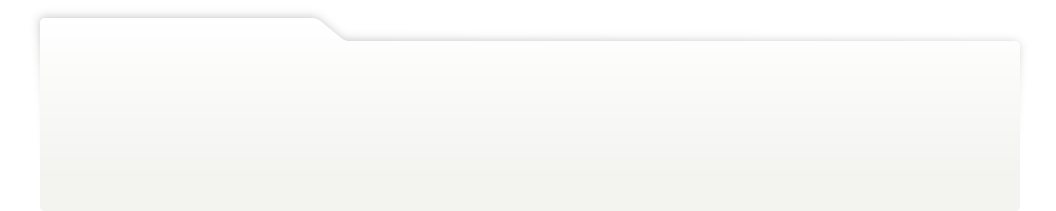
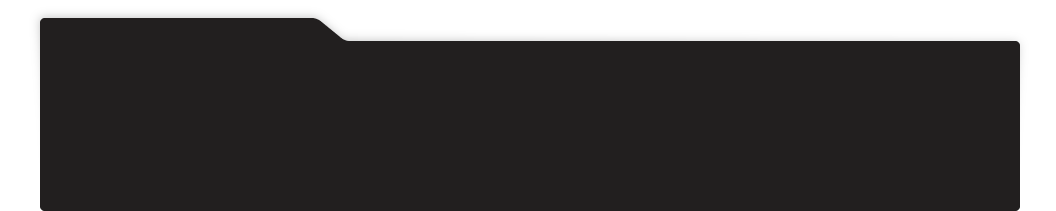
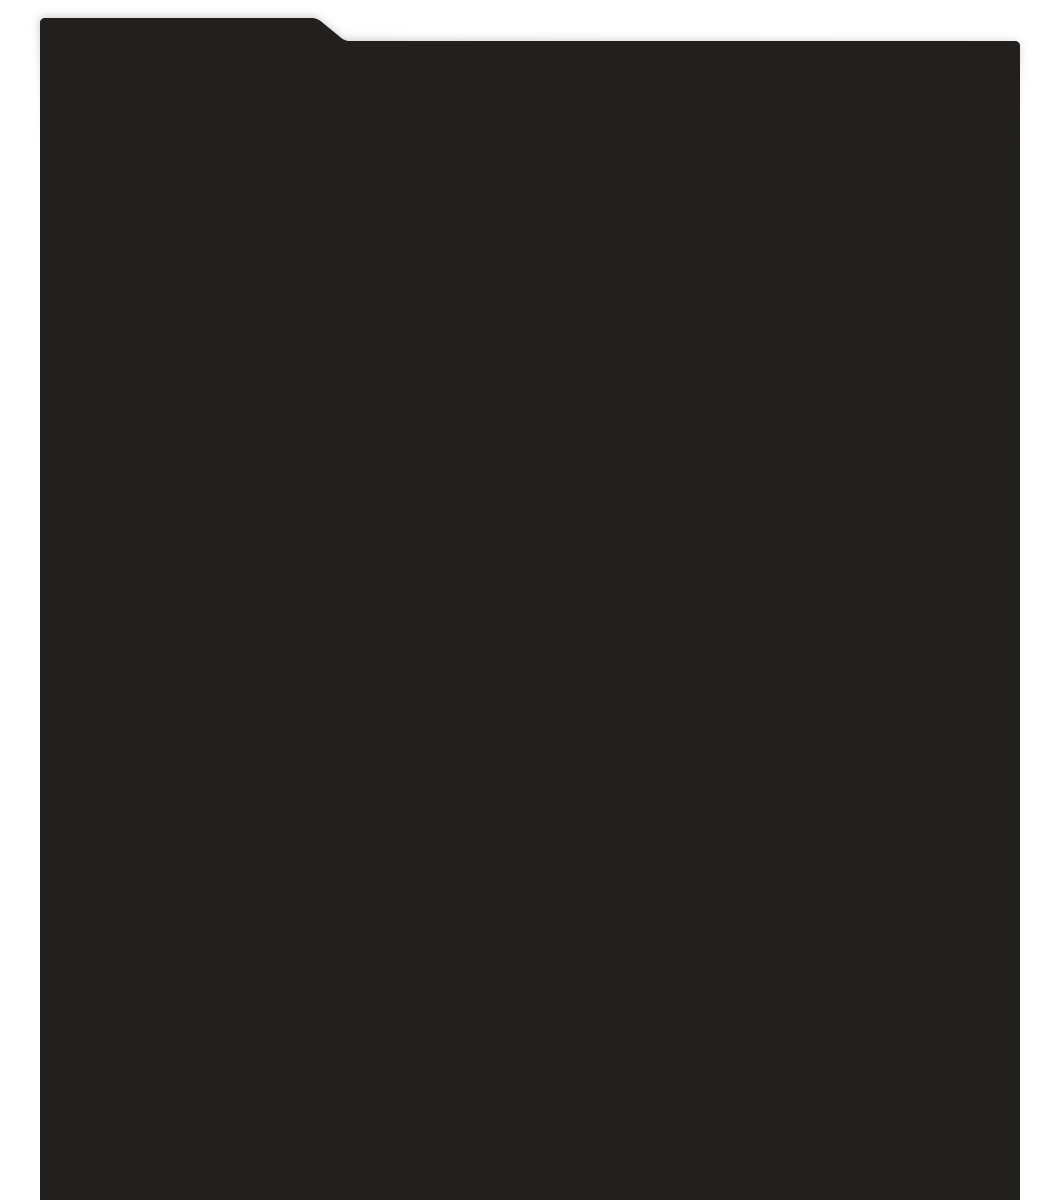
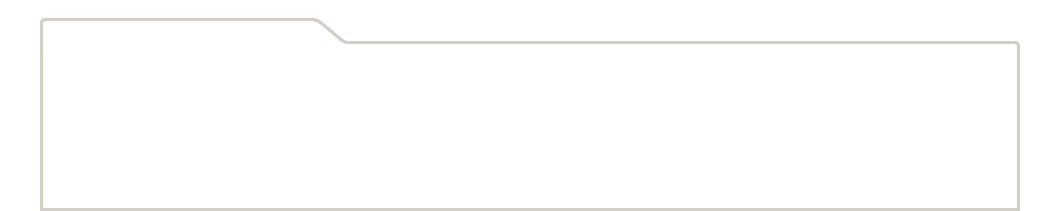
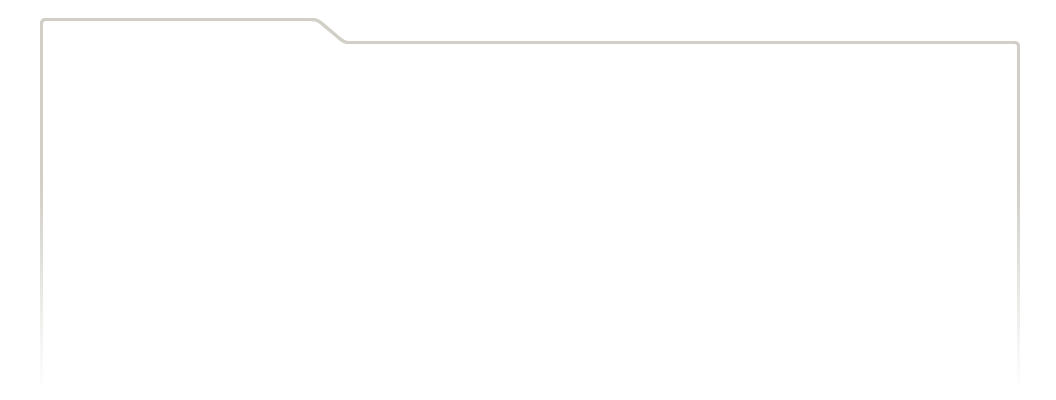
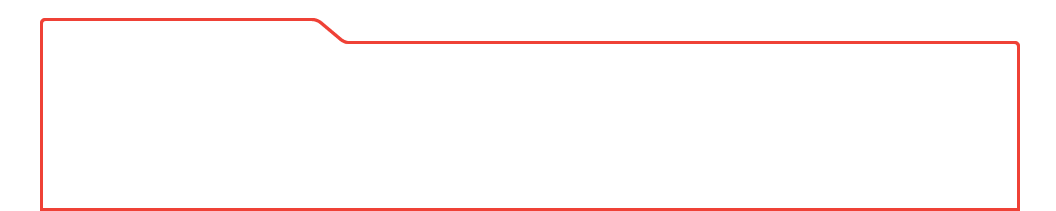
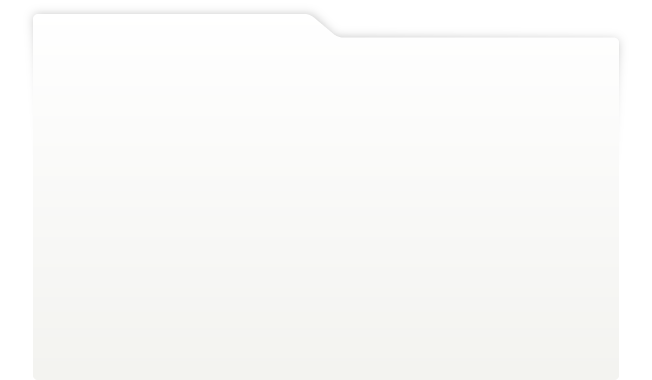
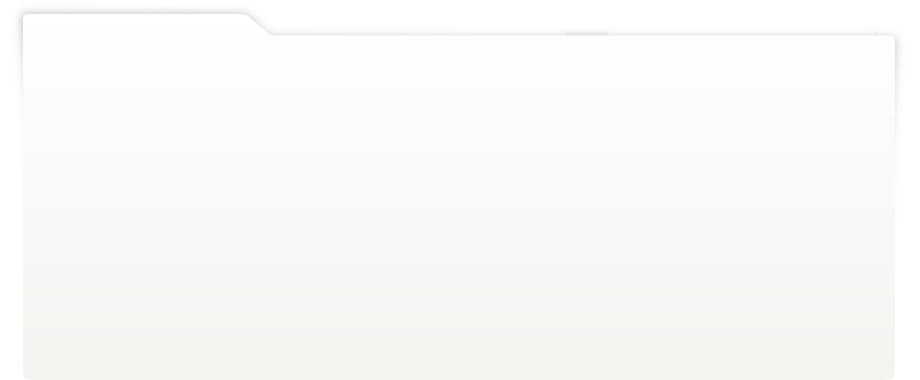
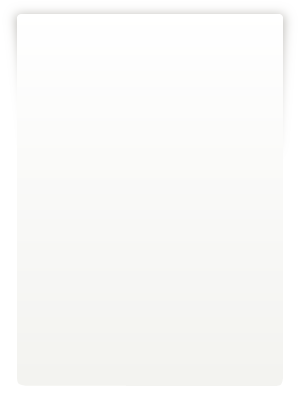
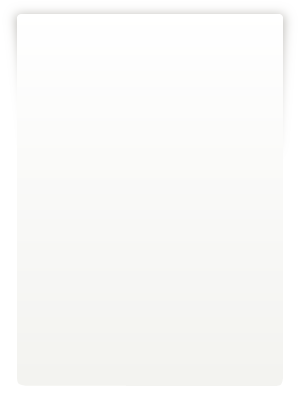
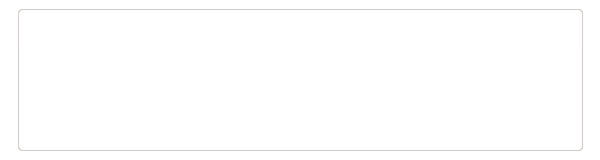
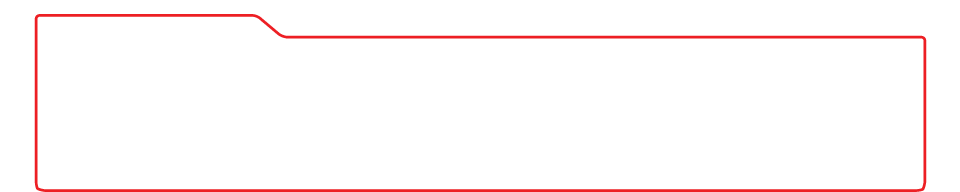
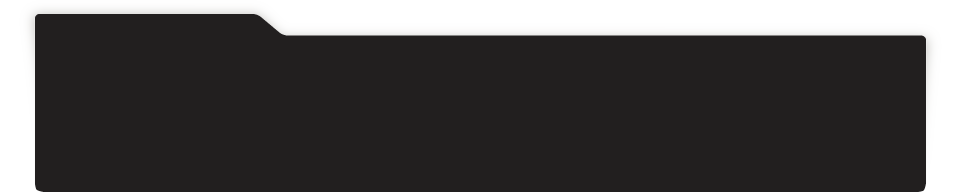
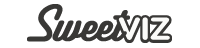
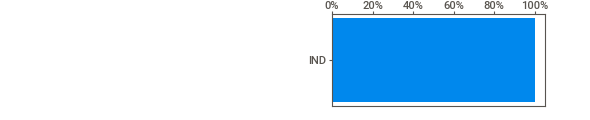
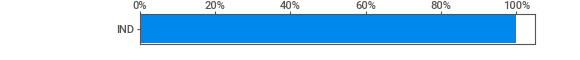
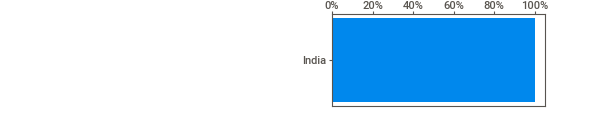
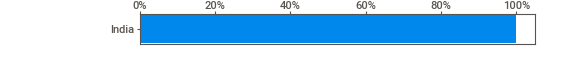
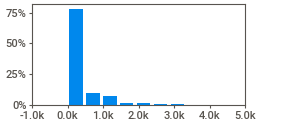
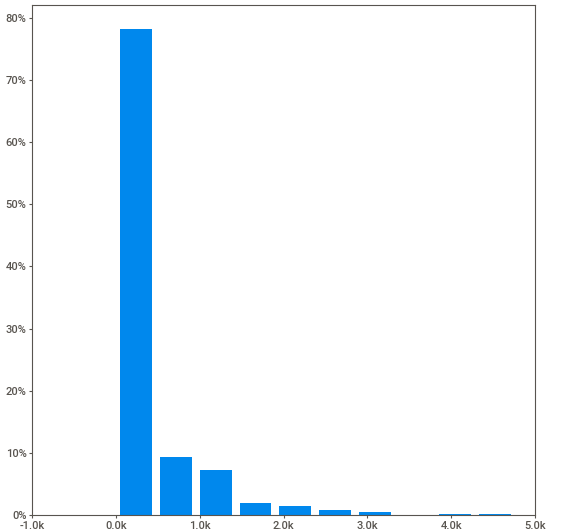
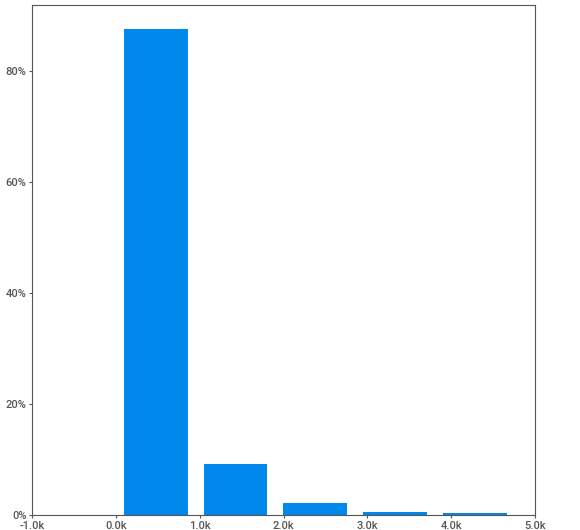
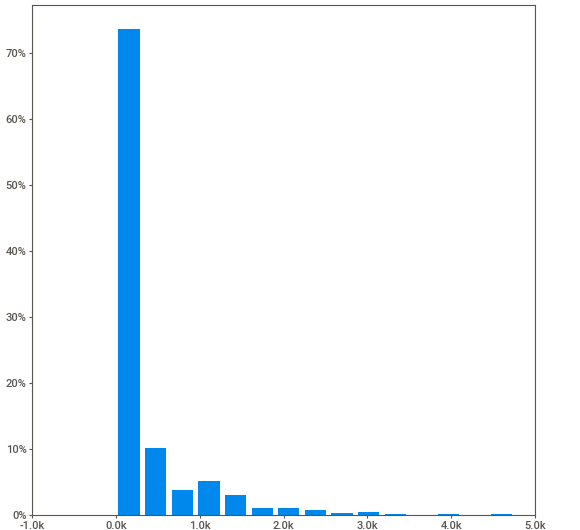
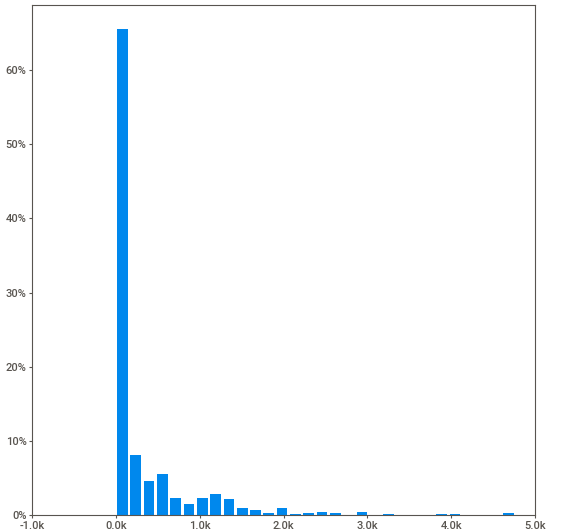
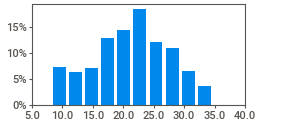
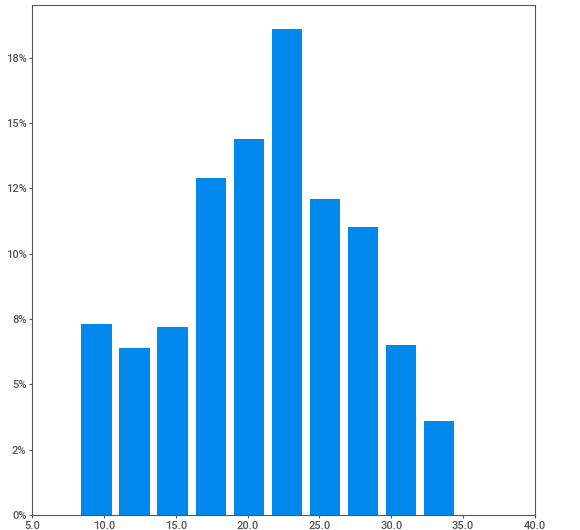
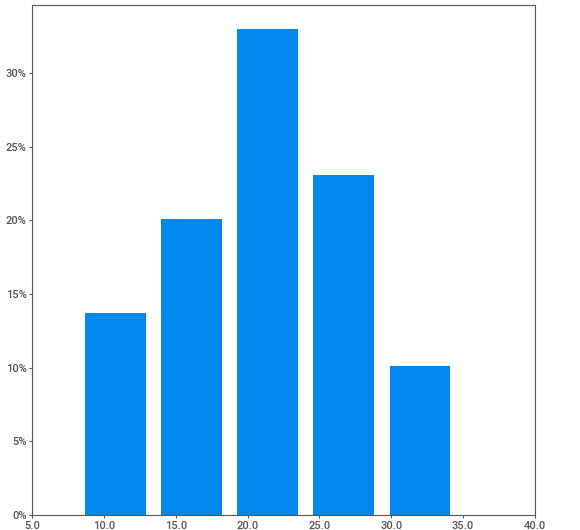
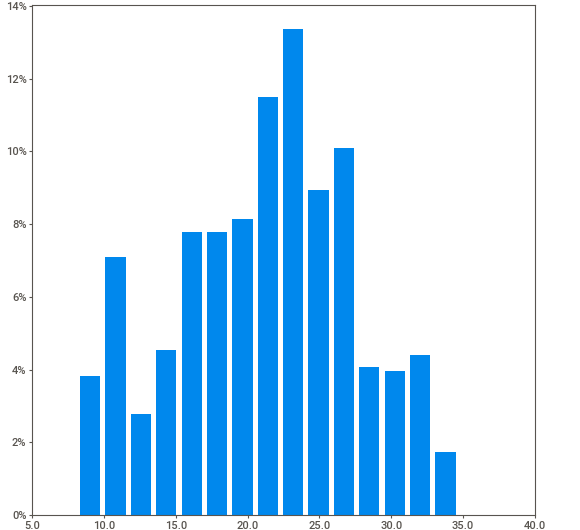
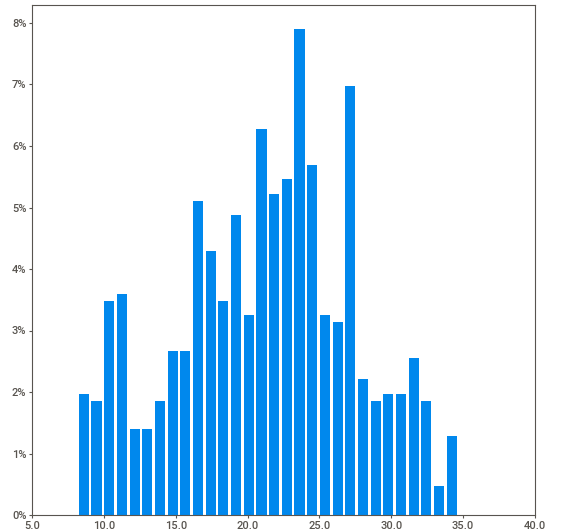
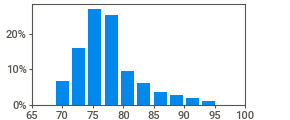
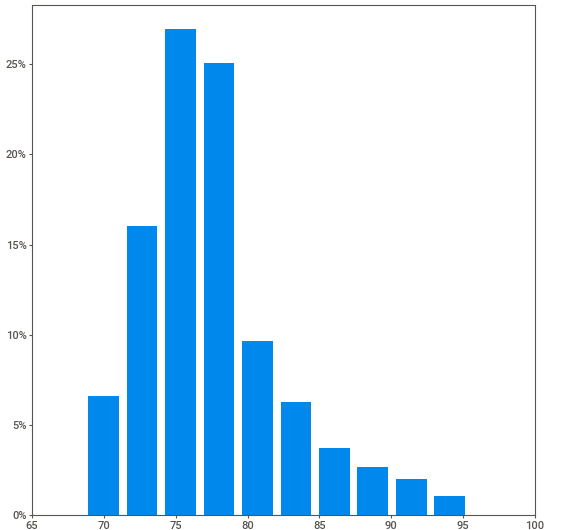
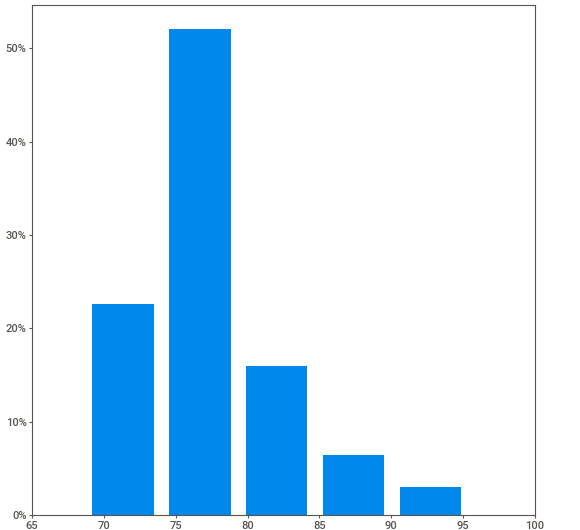
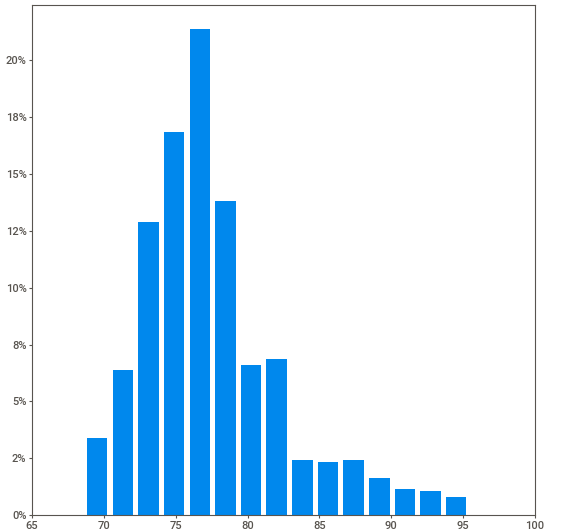
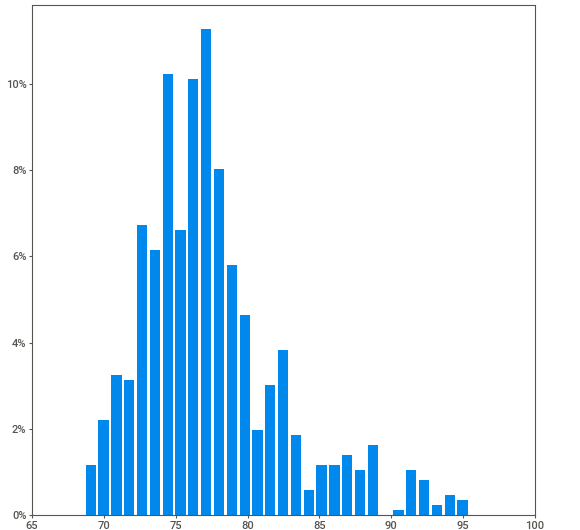
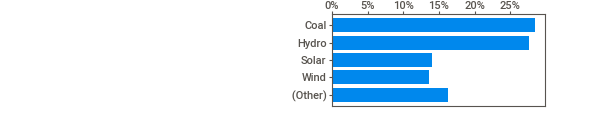
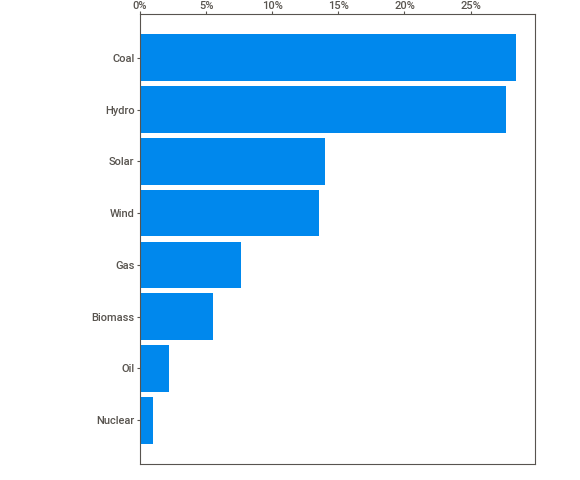
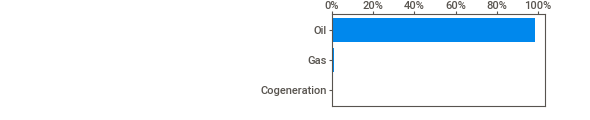
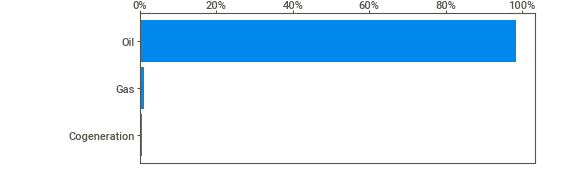
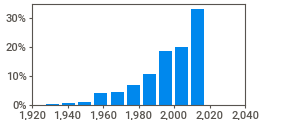
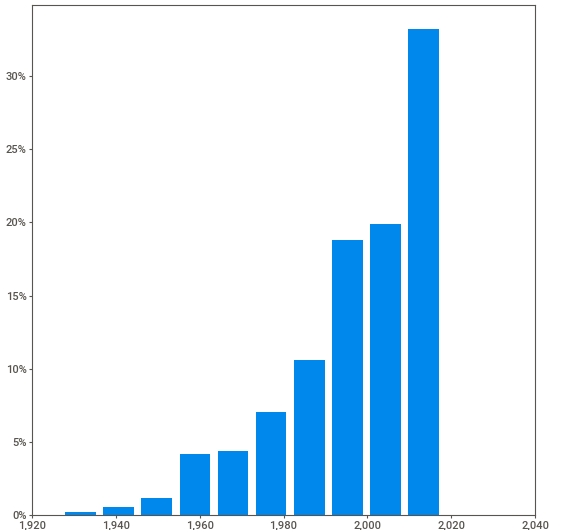
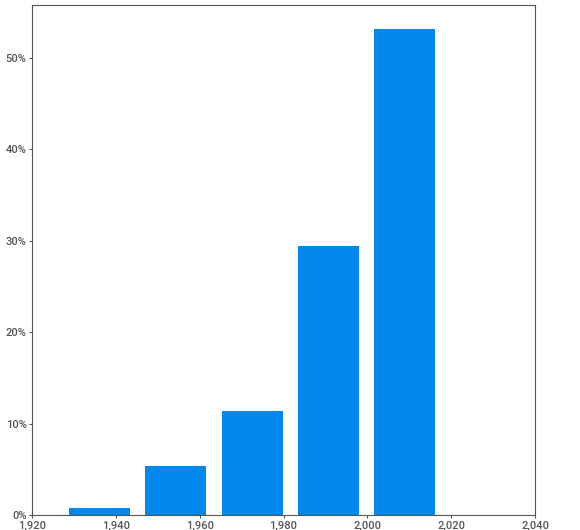
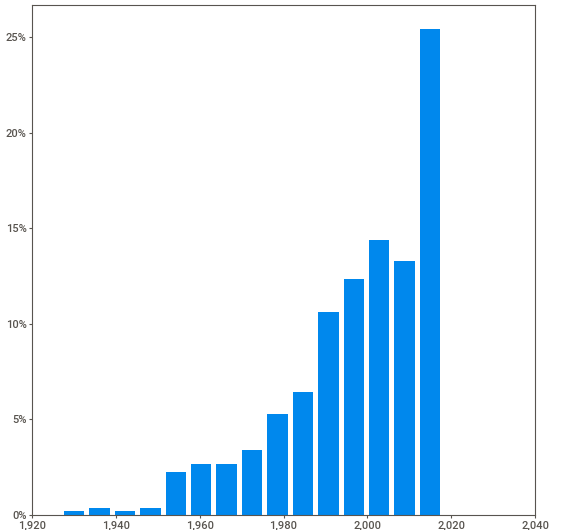
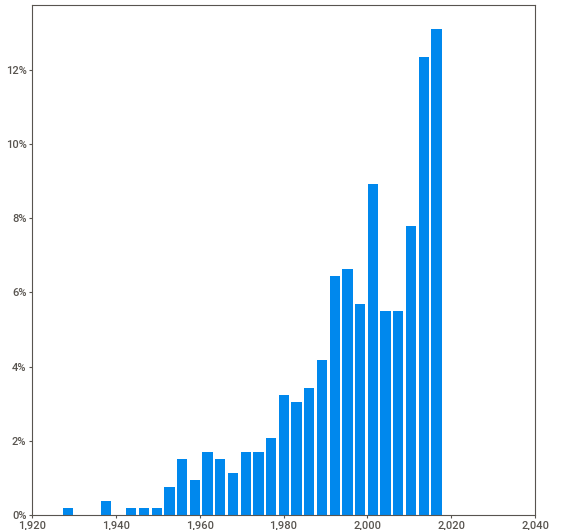
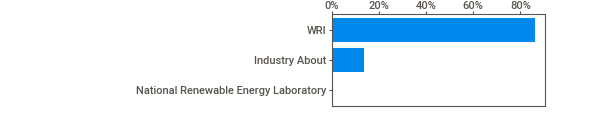
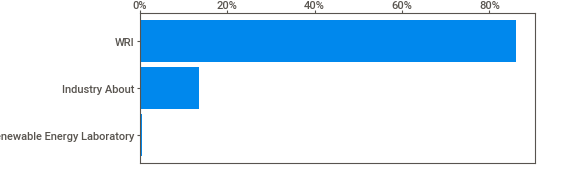
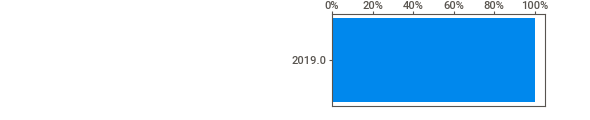
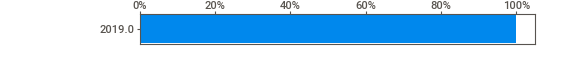
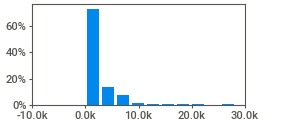
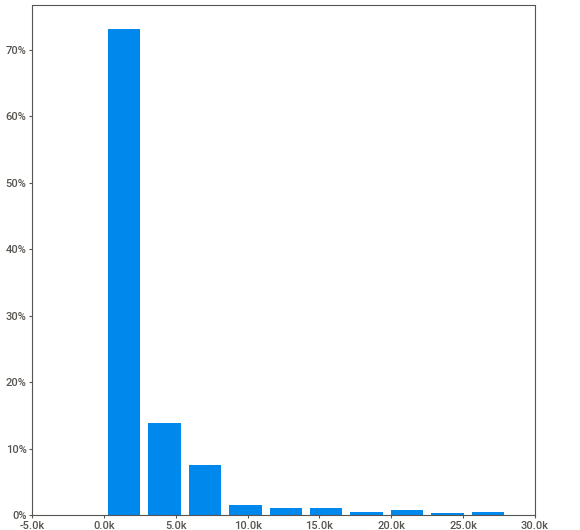
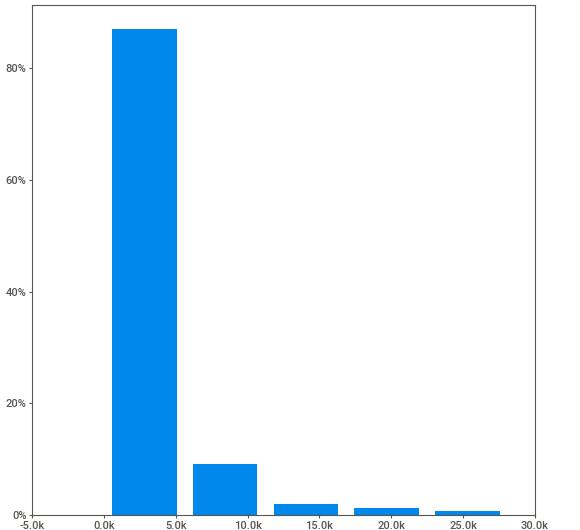
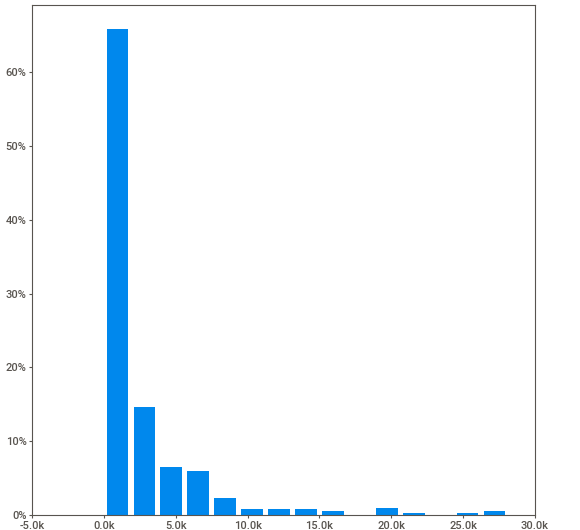
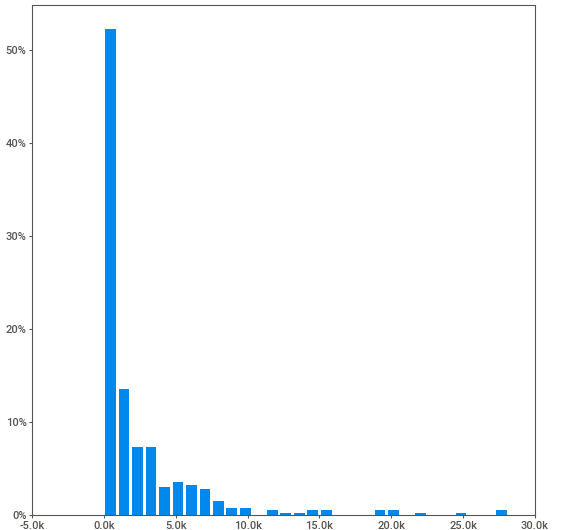
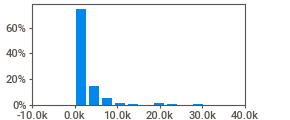
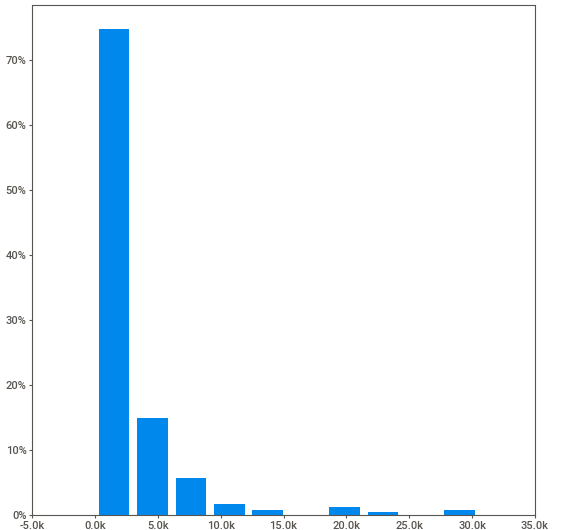
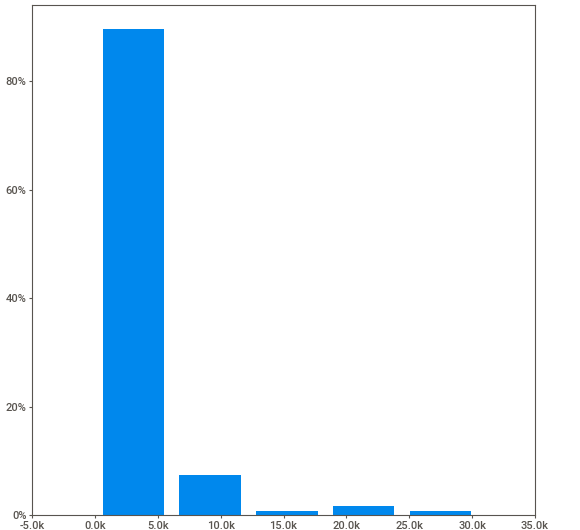
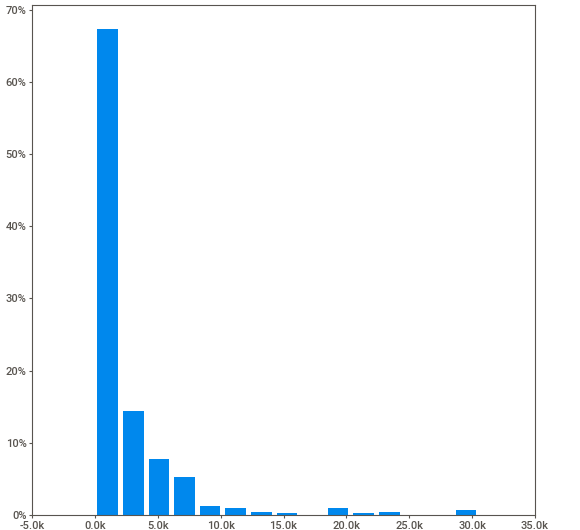
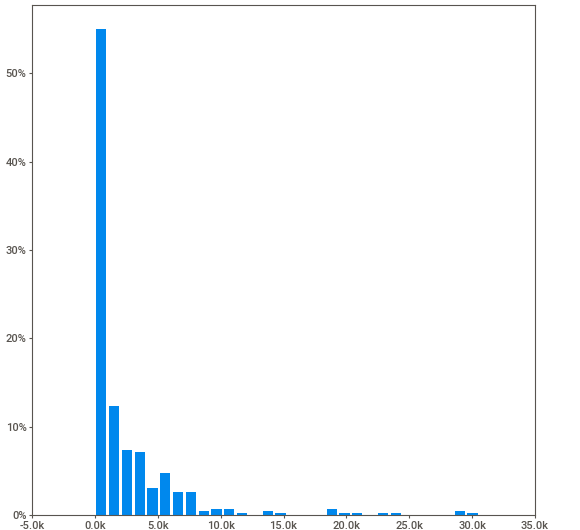
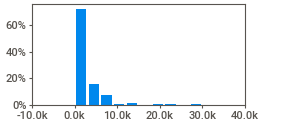
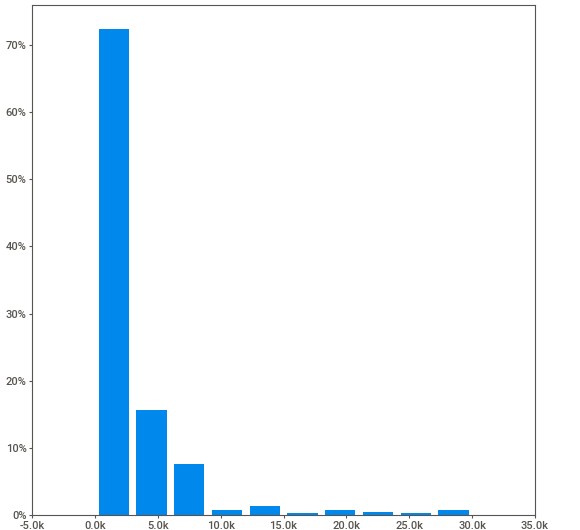
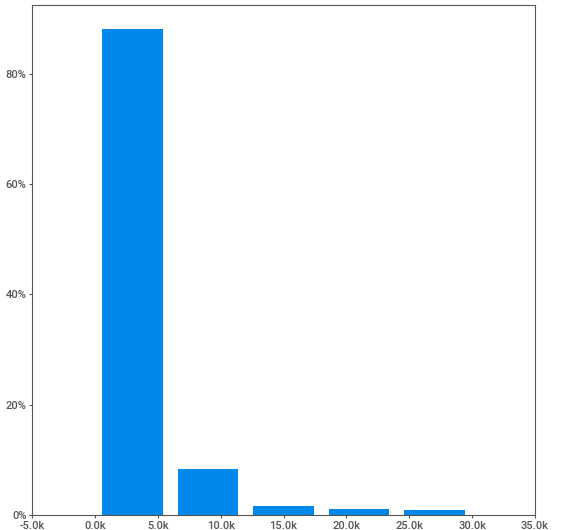
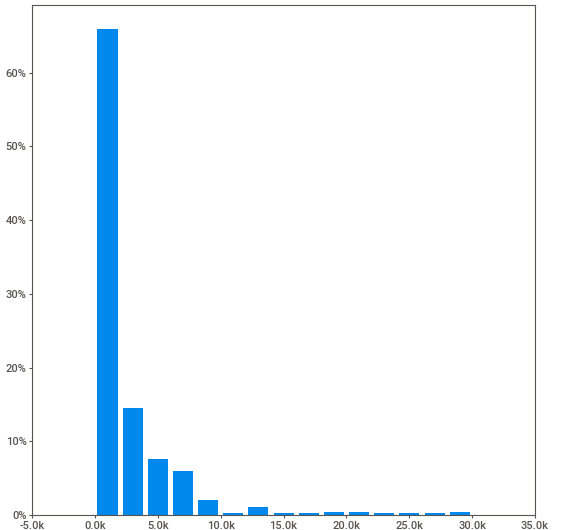
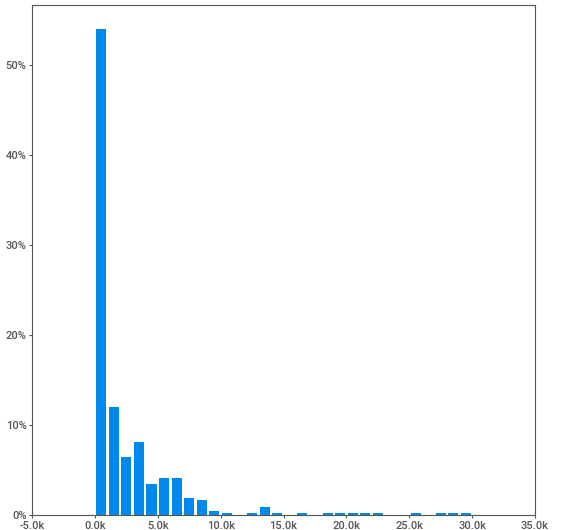
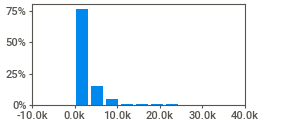
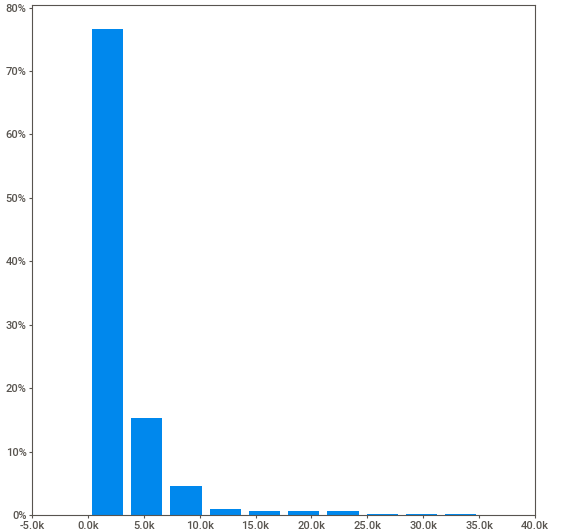
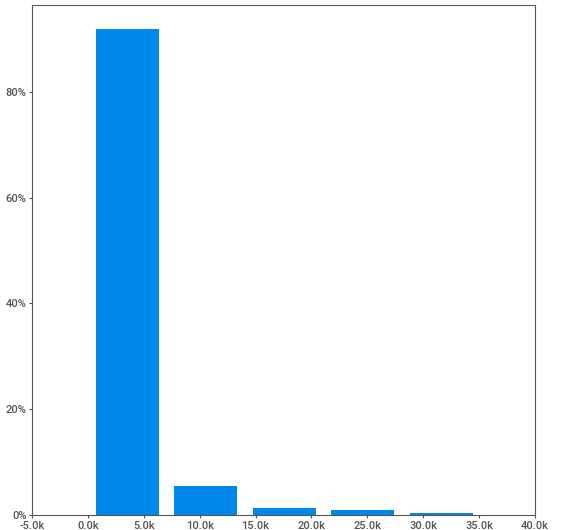
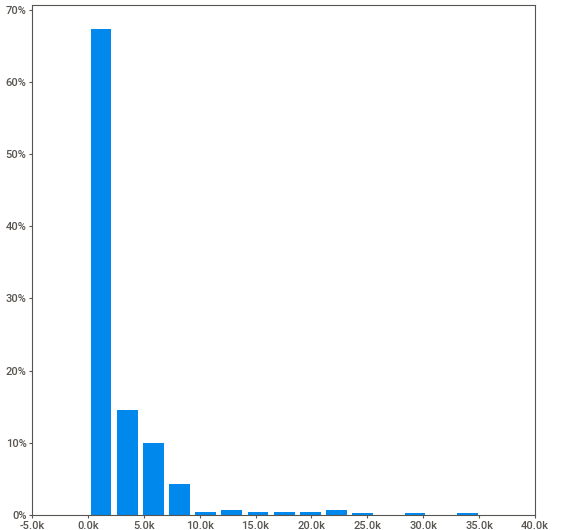
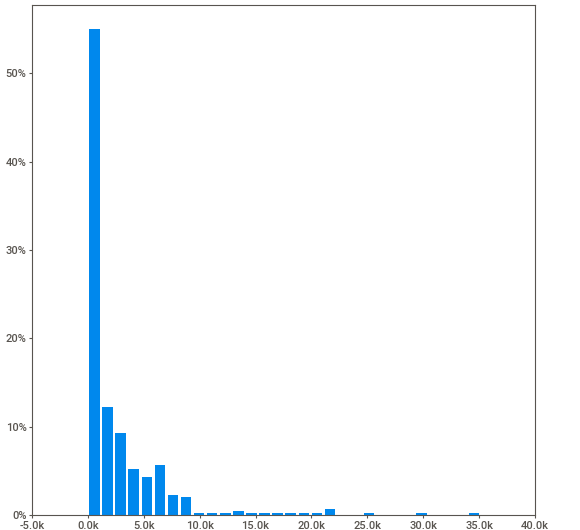
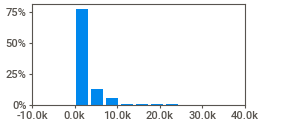
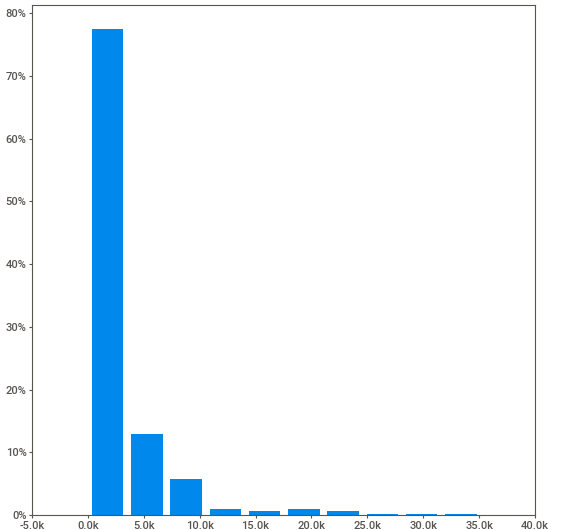
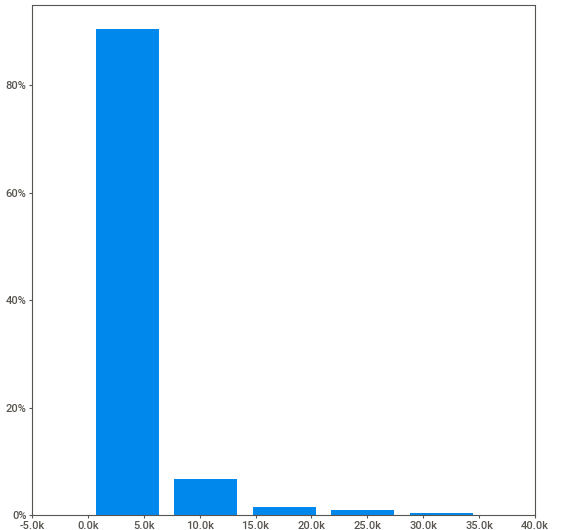
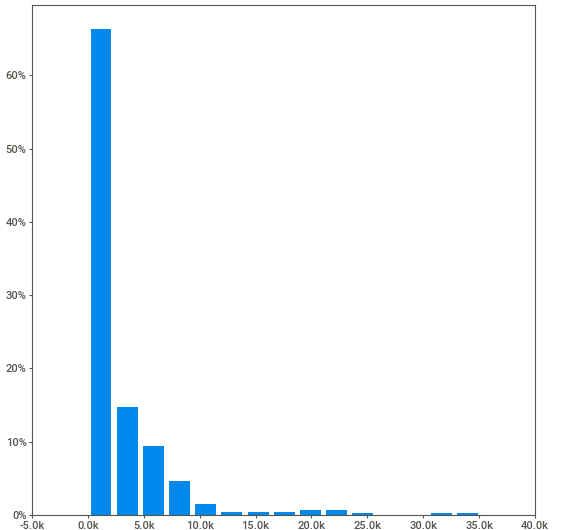
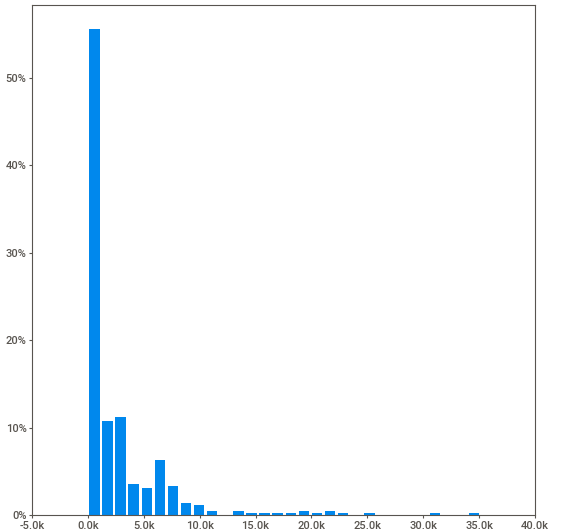
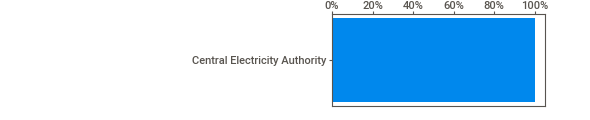
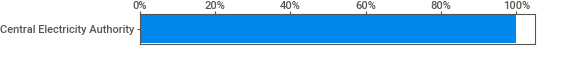
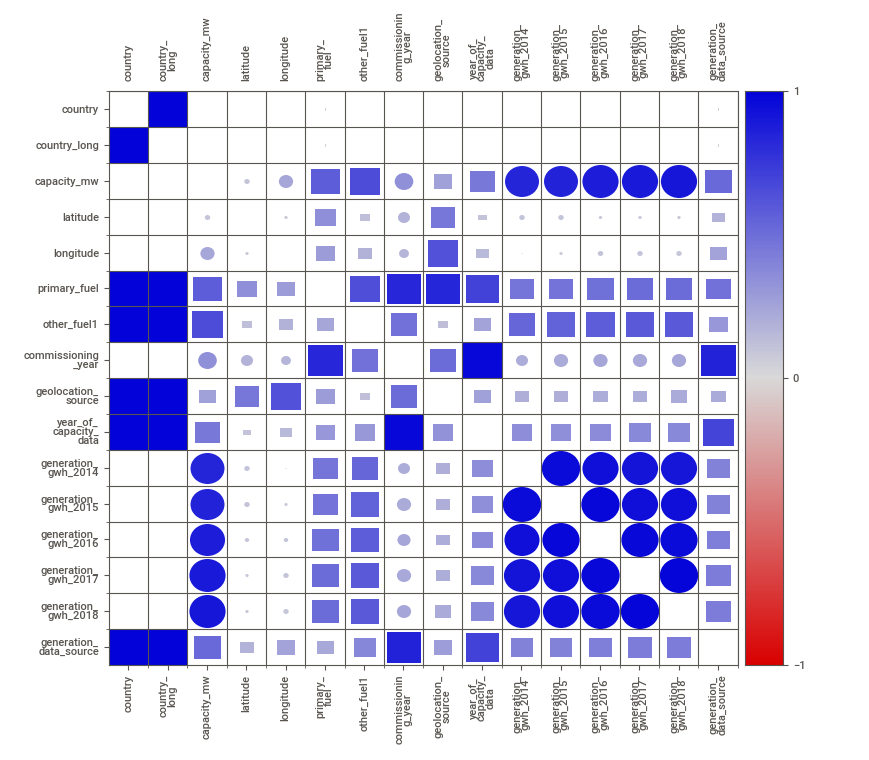
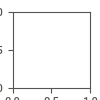

In [9]:
import sweetviz as sw
report = sw.analyze(df)
report.show_notebook(layout='vertical')

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

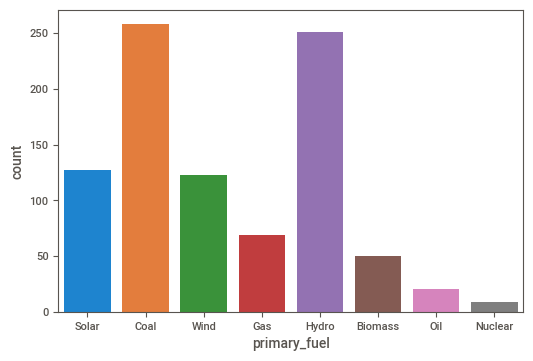

In [10]:
sns.countplot(x=df['primary_fuel'],data=df)
df['primary_fuel'].value_counts()

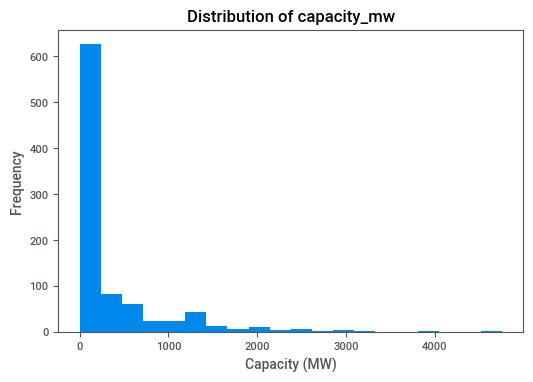

In [11]:
plt.hist(df['capacity_mw'], bins=20)
plt.title('Distribution of capacity_mw')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.show()

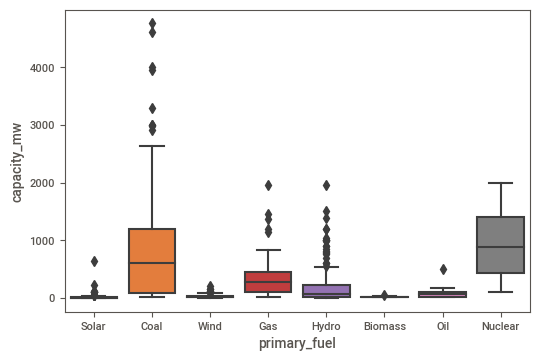

In [12]:
# Capacity by Fuel Type
sns.boxplot(x='primary_fuel', y='capacity_mw', data=df)
plt.show()

(<seaborn.axisgrid.PairGrid at 0x1b3bbf0b070>,)

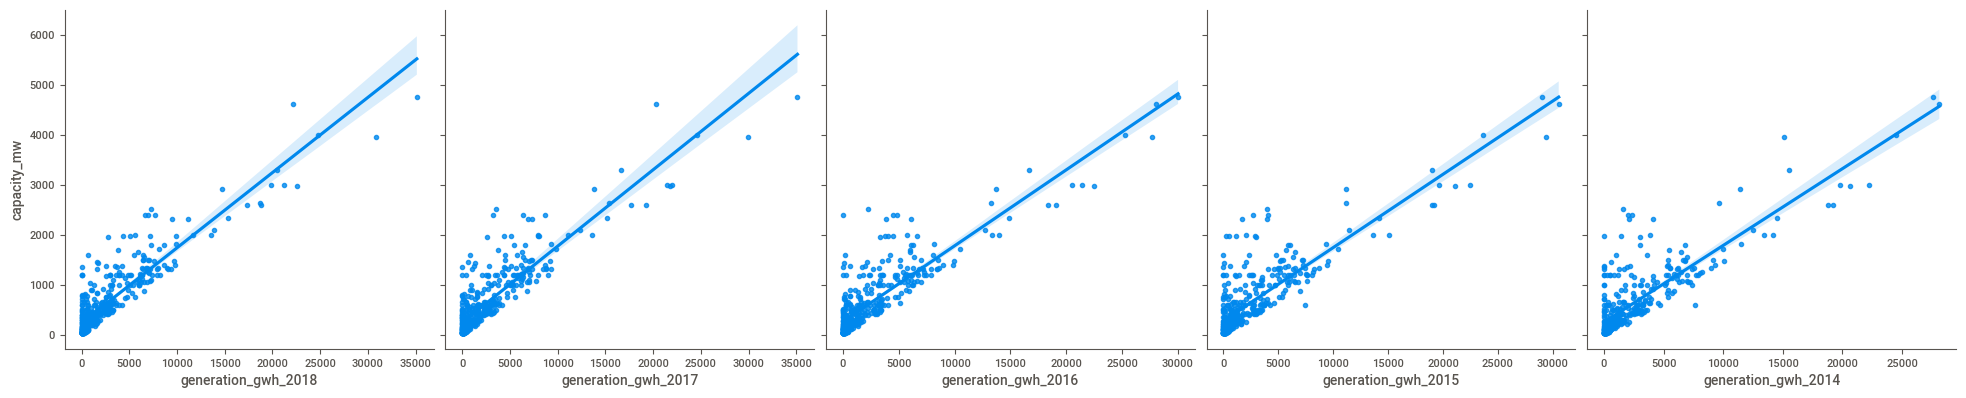

In [13]:
sns.pairplot(df,y_vars='capacity_mw',x_vars=['generation_gwh_2018','generation_gwh_2017','generation_gwh_2016','generation_gwh_2015','generation_gwh_2014'],size=4,aspect=1,kind='reg'),

In [14]:
# Group the data by country and primary fuel
grouped = df.groupby(['country', 'primary_fuel']).size().reset_index(name='count')

# Print the top 10 countries by number of power plants
print(grouped.groupby('country').sum().sort_values('count', ascending=False).head(10))

# Print the top 10 primary fuel types
print(grouped.groupby('primary_fuel').sum().sort_values('count', ascending=False).head(10))

         count
country       
IND        907
              count
primary_fuel       
Coal            258
Hydro           251
Solar           127
Wind            123
Gas              69
Biomass          50
Oil              20
Nuclear           9


In [15]:
# Remove duplicates
df.drop_duplicates(subset='gppd_idnr', inplace=True)

# Fill missing values with 0
df.fillna(0, inplace=True)

# Create X and y for classification and regression
X_classification = df.drop(['primary_fuel', 'gppd_idnr'], axis=1)
y_classification = df['primary_fuel']
X_regression = df.drop(['capacity_mw', 'gppd_idnr'], axis=1)
y_regression = df['capacity_mw']

# Convert categorical features to numerical using one-hot encoding
X_classification = pd.get_dummies(X_classification)
X_regression = pd.get_dummies(X_regression)

# Split data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)


In [16]:
# Train classification model (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_classification, y_train_classification)

# Train regression model (Random Forest)
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_regression, y_train_regression)

# Make predictions for classification and regression
y_pred_classification = clf.predict(X_test_classification)
y_pred_regression = reg.predict(X_test_regression)

# Evaluate accuracy of classification and regression models
acc_classification = accuracy_score(y_test_classification, y_pred_classification)
rmse_regression = mean_squared_error(y_test_regression, y_pred_regression, squared=False)

print("Accuracy of primary fuel prediction: {:.2f}%".format(acc_classification * 100))
print("RMSE of capacity_mw prediction: {:.2f}".format(rmse_regression))

Accuracy of primary fuel prediction: 87.36%
RMSE of capacity_mw prediction: 197.81


In [17]:
#Train classification model(logistic regression)
lr=LogisticRegression()
lr.fit(X_train_classification, y_train_classification)

#Train regression model (Linear Regression)
lg = LinearRegression()
lg.fit(X_train_regression, y_train_regression)

# Make predictions for classification and regression
y_pred_classification = lr.predict(X_test_classification)
y_pred_regression = lg.predict(X_test_regression)

# Evaluate accuracy of classification and regression models
acc_classification = accuracy_score(y_test_classification, y_pred_classification)
rmse_regression = mean_squared_error(y_test_regression, y_pred_regression, squared=False)

print("Accuracy of primary fuel prediction: {:.2f}%".format(acc_classification * 100))
print("RMSE of capacity_mw prediction: {:.2f}".format(rmse_regression))

Accuracy of primary fuel prediction: 53.30%
RMSE of capacity_mw prediction: 209.31


In [18]:
# Train classification model (Random Forest)
dtc = DecisionTreeClassifier()
dtc.fit(X_train_classification, y_train_classification)

# Train regression model (Random Forest)
dtr = DecisionTreeRegressor()
dtr.fit(X_train_regression, y_train_regression)

# Make predictions for classification and regression
y_pred_classification = dtc.predict(X_test_classification)
y_pred_regression = dtr.predict(X_test_regression)

# Evaluate accuracy of classification and regression models
acc_classification = accuracy_score(y_test_classification, y_pred_classification)
rmse_regression = mean_squared_error(y_test_regression, y_pred_regression, squared=False)

print("Accuracy of primary fuel prediction: {:.2f}%".format(acc_classification * 100))
print("RMSE of capacity_mw prediction: {:.2f}".format(rmse_regression))

Accuracy of primary fuel prediction: 87.36%
RMSE of capacity_mw prediction: 277.57


In [19]:
# save the model to disk
filename = 'randomforestclassifier_model.sav'
joblib.dump(clf, filename)

# load the model from disk
loaded_model = joblib.load(filename)

# make predictions using the loaded model
ypredclf = loaded_model.predict(X_test_classification)

In [20]:
# save the model to disk
filename = 'randomforestregressor_model.sav'
joblib.dump(reg, filename)

# load the model from disk
loaded_model = joblib.load(filename)

# make predictions using the loaded model
ypredreg = loaded_model.predict(X_test_regression)

In [21]:
#show the predicted data
capacity=pd.DataFrame({'Capacity_mw':y_test_regression,'Predicted capacity_mw':ypredreg},columns=['Capacity_mw','Predicted capacity_mw'])
capacity

,Capacity_mw,Predicted capacity_mw
868,187.200,329.40047
439,50.400,30.84900
342,41.400,61.28030
735,770.000,356.50210
784,4.500,5.49200
836,1.500,13.76050
522,45.000,115.63700
265,21.000,9.24200
902,1600.000,363.83288
539,10.500,34.73250


In [23]:
#show the predicted data
fuel=pd.DataFrame({'Primary_fuel':y_test_classification,'Predicted primary fuel':ypredclf},columns=['Primary_fuel','Predicted primary fuel'])
fuel

,Primary_fuel,Predicted primary fuel
868,Gas,Hydro
439,Wind,Wind
342,Hydro,Hydro
735,Hydro,Hydro
784,Hydro,Hydro
836,Wind,Wind
522,Hydro,Hydro
265,Wind,Wind
902,Coal,Coal
539,Coal,Biomass
